In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/christinemagnotta/Booty/05-Matplotlib/HW/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/christinemagnotta/Booty/05-Matplotlib/HW/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [22]:
# Combine the data into a single dataset

#I believe I want to do a Left-join.

mouse_metadata = mouse_metadata.merge(study_results,how='left', left_on='Mouse ID', right_on='Mouse ID')


In [23]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
#Checking the number of mice.
#I think I will want to perform a groupby operation.



In [29]:
mouse_metadata.groupby('Mouse ID').count()  #I have 249 mice. Checked the data set and that checks out.

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
#So I want to drop_duplicates
#df.drop_duplicates(subset=['brand', 'style'], keep='last') This I got from pandas.pydata: df.drop_duplicates(subset=['brand', 'style'], keep='last')

mouse_metadata.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
#Duplicate times seem to have been dropped. There are 5 fewer rows than when the data was first ran.

In [31]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
#I am not sure if this is the same as the above step, which removed duplicates based on Timepoint and Mouse ID
#I can't drop_duplicates based on Mouse ID because each mouse has as many as 10 Timepoints.


mouse_metadata.groupby('Mouse ID').count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [32]:
#It's still 249. I don't know if that's right.

mouse_metadata.groupby("Mouse ID").count()["Timepoint"]

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [33]:
cleanMice = mouse_metadata.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [34]:
cleanMice.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.448411,1.023305
std,7.186737,3.926776,14.084762,8.904752,1.138751
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [35]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleanMice[["Drug Regimen"]].describe()

,Drug Regimen
count,1888
unique,10
top,Capomulin
freq,230


In [183]:
cleanMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
#Okay. That didn't work. Let's try something else.


In [56]:
cleanMice[["Drug Regimen", "Tumor Volume (mm3)"]].describe()

,Tumor Volume (mm3)
count,1888.000000
mean,50.448411
std,8.904752
min,22.050126
25%,45.000000
50%,48.951421
75%,56.324075
max,78.567014


In [59]:
#That didn't seem to give me the data I want, either.

cleanMice.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [62]:
cleanMice[["Drug Regimen", "Tumor Volume (mm3)"]]

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [64]:
cleanMice[["Drug Regimen", "Tumor Volume (mm3)"]].describe()

,Tumor Volume (mm3)
count,1888.000000
mean,50.448411
std,8.904752
min,22.050126
25%,45.000000
50%,48.951421
75%,56.324075
max,78.567014


In [65]:
#GroupBy of Drug Regimen and Tumor Volume.   mergedMice.groupby(["Mouse ID"]).count()["Timepoint"]

In [66]:
cleanMice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [139]:
#mean = cleanMice.groupby(["Drug Regimen"]).mean()


In [159]:
median = cleanMice.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

In [160]:
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [164]:
mean = cleanMice.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]  #This is the mean for the Tumor Volume. But I need a single dataframe with the other calculations.

In [157]:
variance = cleanMice.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

In [158]:
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [161]:
stdeviation = cleanMice.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

In [162]:
stdeviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [147]:
stdeviation

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,7.188801,1.686908,13.571297,6.574208,1.092477
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [165]:
#mean


newMiceDF = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Standard Deviation": stdeviation, "Variance":variance})

In [166]:
newMiceDF

,Mean Tumor Volume,Median Tumor Volume,Standard Deviation,Variance
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764
Ceftamin,52.591172,51.776157,6.268188,39.290177
Infubinol,52.884795,51.820584,6.567243,43.128684
Ketapril,55.235638,53.698743,8.279709,68.553577
Naftisol,54.331565,52.509285,8.134708,66.173479
Placebo,54.033581,52.288934,7.821003,61.168083
Propriva,52.382993,50.783528,6.574208,43.220205
Ramicane,40.216745,40.673236,4.846308,23.486704
Stelasyn,54.233149,52.431737,7.710419,59.450562


In [170]:
cleanMiceAgg = cleanMice.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median', 'var', 'std']})
                                         

In [171]:
cleanMiceAgg

Tumor Volume (mm3)                                
                           mean     median        var       std
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  4.994774
Ceftamin              52.591172  51.776157  39.290177  6.268188
Infubinol             52.884795  51.820584  43.128684  6.567243
Ketapril              55.235638  53.698743  68.553577  8.279709
Naftisol              54.331565  52.509285  66.173479  8.134708
Placebo               54.033581  52.288934  61.168083  7.821003
Propriva              52.382993  50.783528  43.220205  6.574208
Ramicane              40.216745  40.673236  23.486704  4.846308
Stelasyn              54.233149  52.431737  59.450562  7.710419
Zoniferol             53.236507  51.818479  48.533355  6.966589

In [209]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

cleanMice.drop_duplicates("Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [600]:
#Get a count of Mice In each Drug Regimen

cleanMice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [601]:
drugMice = cleanMice[["Drug Regimen", "Mouse ID"]]

In [602]:
cleandrugMice = drugMice.drop_duplicates("Mouse ID")

In [603]:
drugPlot = cleandrugMice.groupby("Drug Regimen").count()["Mouse ID"]

In [604]:
drugPlot

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

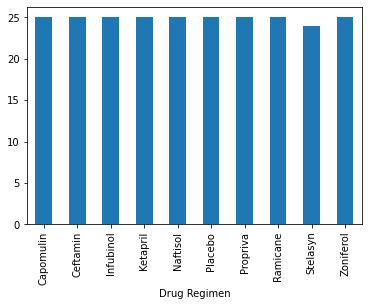

In [605]:
drugPlot.plot.bar(x="Drug Regimen", y="Mouse ID")

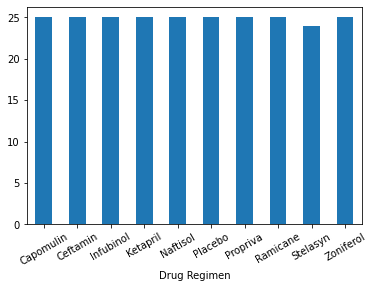

In [606]:
#Same chart with matplotlib

from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd

drugs = ["Drug Regimen"]
mice = ["Mice ID"].count


drugPlot.plot.bar(x='Drug Regimen', rot=30)

In [298]:
sexMice = cleanMice[["Sex", "Mouse ID"]]
cleansexMice = sexMice.drop_duplicates("Mouse ID")
sexPlot = cleansexMice.groupby("Mouse ID").count()["Sex"]

In [300]:
sexMice

,Sex,Mouse ID
0,Male,k403
1,Male,k403
2,Male,k403
3,Male,k403
4,Male,k403
...,...,...
1888,Male,z969
1889,Male,z969
1890,Male,z969
1891,Male,z969


In [301]:
cleansexMice = sexMice.drop_duplicates("Mouse ID")

In [302]:
cleansexMice

,Sex,Mouse ID
0,Male,k403
10,Female,s185
20,Female,x401
30,Male,m601
40,Male,g791
...,...,...
1858,Female,z314
1860,Female,z435
1863,Female,z581
1873,Female,z795


In [305]:
sexPlot = cleansexMice.groupby("Sex").count()["Mouse ID"]

In [306]:
sexPlot

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

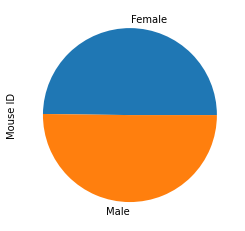

In [309]:
sexPlot.plot.pie(x="Sex", y="Mouse ID")

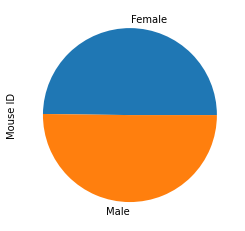

In [363]:
#Same chart with matplotlib
sexPlot.plot.pie(x='Sex', rot=0)

In [36]:
cleanMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

In [213]:
treatments = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drugTreatments = mouse_metadata.loc[mouse_metadata["Drug Regimen"].isin(treatments)]

In [215]:
drugTreatments

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [248]:
#This is my second attempt to do this part of the assignment.
#I tried to use a loc function, although that did end up working, I couldn't turn that information back into a DF in order to complete the rest of the assignment.


mousePoint = drugTreatments.groupby(drugTreatments['Mouse ID']).agg({'Timepoint':['max']})
mousePoint.columns = ["Timepoint"]
mousePoint = mousePoint.reset_index()
lastTumorVol = pd.merge(mousePoint, drugTreatments, how="left", on=['Mouse ID'])

In [249]:
lastTumorVol

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2
810,z581,45,Infubinol,Female,24,25,30,56.286750,2
811,z581,45,Infubinol,Female,24,25,35,58.628399,3
812,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [305]:
mousePoint = cleanMice[["Mouse ID", "Tumor Volume (mm3)", "Timepoint", "Drug Regimen"]]

In [306]:
mousePoint[mousePoint.Timepoint == mousePoint.Timepoint.max()]  #So I have the last timepoint for each mouse. But now I need to isolate the Drug regimens

,Mouse ID,Tumor Volume (mm3),Timepoint,Drug Regimen
9,k403,22.050126,45,Ramicane
19,s185,23.343598,45,Capomulin
29,x401,28.484033,45,Capomulin
39,m601,28.430964,45,Capomulin
49,g791,29.128472,45,Ramicane
...,...,...,...,...
1845,y769,68.594745,45,Ceftamin
1855,y865,64.729837,45,Ceftamin
1872,z581,62.754451,45,Infubinol
1882,z795,65.741070,45,Naftisol


In [307]:
mousePointMax = mousePoint[mousePoint.Timepoint == mousePoint.Timepoint.max()] 

In [308]:
mousePointMax

,Mouse ID,Tumor Volume (mm3),Timepoint,Drug Regimen
9,k403,22.050126,45,Ramicane
19,s185,23.343598,45,Capomulin
29,x401,28.484033,45,Capomulin
39,m601,28.430964,45,Capomulin
49,g791,29.128472,45,Ramicane
...,...,...,...,...
1845,y769,68.594745,45,Ceftamin
1855,y865,64.729837,45,Ceftamin
1872,z581,62.754451,45,Infubinol
1882,z795,65.741070,45,Naftisol


In [309]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#I was not able to get the for loop to work, but I still want to do a box plot.


mousePointInd = mousePointMax.set_index(["Drug Regimen"])


In [310]:
mousePointInd

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Ramicane,k403,22.050126,45
Capomulin,s185,23.343598,45
Capomulin,x401,28.484033,45
Capomulin,m601,28.430964,45
Ramicane,g791,29.128472,45
...,...,...,...
Ceftamin,y769,68.594745,45
Ceftamin,y865,64.729837,45
Infubinol,z581,62.754451,45


In [320]:
Capomulin = mousePointInd.loc['Capomulin']
CapomulinVol = Capomulin.drop(columns=['Timepoint'])

In [321]:
CapomulinVol

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,s185,23.343598
Capomulin,x401,28.484033
Capomulin,m601,28.430964
Capomulin,u364,31.023923
Capomulin,y793,31.896238
Capomulin,r554,32.377357
Capomulin,m957,33.329098
Capomulin,t565,34.455298
Capomulin,i738,37.311846


TypeError: can only concatenate str (not "float") to str

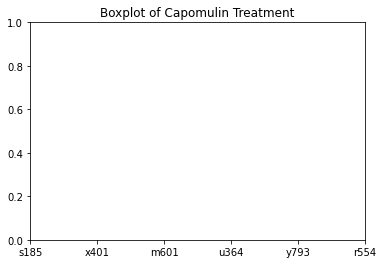

In [334]:
fig, ax = plt.subplots()
ax.set_title("Boxplot of Capomulin Treatment")
ax.set_xticklabels(CapomulinVol["Mouse ID"])
ax.boxplot(CapomulinVol)["Tumor Volume (mm3)"]
plot.show()

In [ ]:
ax.boxplots(CapomulinVol)
plot.show()

In [260]:
mergedDrugs #Here's the list from my failed attempt.

{'Infubinol':              Mouse ID  Tumor Volume (mm3)  Timepoint
 Drug Regimen                                        
 Infubinol        a203           67.973419         45
 Infubinol        a251           65.525743         45
 Infubinol        a685           66.083066         45
 Infubinol        c139           72.226731         45
 Infubinol        e476           62.435404         45
 Infubinol        f345           60.918767         45
 Infubinol        k483           66.196912         45
 Infubinol        y163           67.685569         45
 Infubinol        z581           62.754451         45,
 'Ceftamin':              Mouse ID  Tumor Volume (mm3)  Timepoint
 Drug Regimen                                        
 Ceftamin         a275           62.999356         45
 Ceftamin         j296           61.849023         45
 Ceftamin         k210           68.923185         45
 Ceftamin         l471           67.748662         45
 Ceftamin         l661           59.851956         45
 C

In [403]:
#Line and Scatter Plots

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



In [487]:
#cleanMice
#DataFrame.plot.line
#s710, tumor volume v. timepoint


mousePlot = cleanMice[["Tumor Volume (mm3)", "Timepoint", "Mouse ID"]]

In [488]:
mousePlot

,Tumor Volume (mm3),Timepoint,Mouse ID
0,45.000000,0,k403
1,38.825898,5,k403
2,35.014271,10,k403
3,34.223992,15,k403
4,32.997729,20,k403
...,...,...,...
1888,63.145652,25,z969
1889,65.841013,30,z969
1890,69.176246,35,z969
1891,70.314904,40,z969


In [491]:
s710 = mousePlot.loc['s710': "Tumor Volume (mm3)", "Timepoint"]

In [492]:
s710

Series([], Name: Timepoint, dtype: int64)

In [503]:
#Blerg that didn't work!

#s710 = mousePlot.loc['s710']

mousePlotIn = mousePlot.set_index("Mouse ID")

In [506]:
mousePlotIn

,Tumor Volume (mm3),Timepoint
Mouse ID,,
k403,45.000000,0
k403,38.825898,5
k403,35.014271,10
k403,34.223992,15
k403,32.997729,20
...,...,...
z969,63.145652,25
z969,65.841013,30
z969,69.176246,35


In [507]:
s710 = mousePlotIn.loc["s710"]

In [508]:
s710

,Tumor Volume (mm3),Timepoint
Mouse ID,,
s710,45.000000,0
s710,43.180977,5
s710,43.688026,10
s710,41.845235,15
s710,42.629963,20
s710,43.060409,25
s710,43.571703,30
s710,44.160519,35
s710,40.171920,40


In [510]:
type(s710)

pandas.core.frame.DataFrame

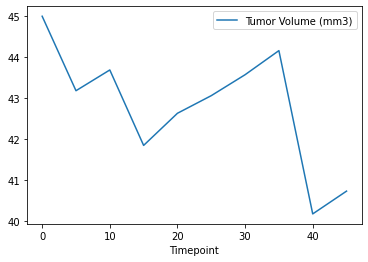

In [512]:
s710.plot.line(x="Timepoint",y="Tumor Volume (mm3)")

In [513]:
#YAY!

In [279]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen.

drupPlot = cleanMice[["Drug Regimen", "Tumor Volume (mm3)", "Weight (g)"]]

drugPlotIn = drupPlot.set_index("Drug Regimen")

In [280]:
drugPlotIn

,Tumor Volume (mm3),Weight (g)
Drug Regimen,,
Ramicane,45.000000,16
Ramicane,38.825898,16
Ramicane,35.014271,16
Ramicane,34.223992,16
Ramicane,32.997729,16
...,...,...
Naftisol,63.145652,30
Naftisol,65.841013,30
Naftisol,69.176246,30


In [281]:
CapomulinDrug = drugPlotIn.loc["Capomulin"]

In [282]:
CapomulinDrug

,Tumor Volume (mm3),Weight (g)
Drug Regimen,,
Capomulin,45.000000,17
Capomulin,43.878496,17
Capomulin,37.614948,17
Capomulin,38.177232,17
Capomulin,36.866876,17
...,...,...
Capomulin,47.685963,24
Capomulin,45.000000,25
Capomulin,45.597064,25


In [283]:
CapomulinDrug.mean(axis=1)
#This doesn't seem right. I don't think I'm getting the right data.

Drug Regimen
Capomulin    31.000000
Capomulin    30.439248
Capomulin    27.307474
Capomulin    27.588616
Capomulin    26.933438
               ...    
Capomulin    35.842982
Capomulin    35.000000
Capomulin    35.298532
Capomulin    35.529804
Capomulin    35.769603
Length: 230, dtype: float64

In [539]:
CapomulinDrug.head(20)

,Tumor Volume (mm3),Weight (g)
Drug Regimen,,
Capomulin,45.000000,17
Capomulin,43.878496,17
Capomulin,37.614948,17
Capomulin,38.177232,17
Capomulin,36.866876,17
Capomulin,33.949940,17
Capomulin,32.959671,17
Capomulin,28.328531,17
Capomulin,25.472143,17


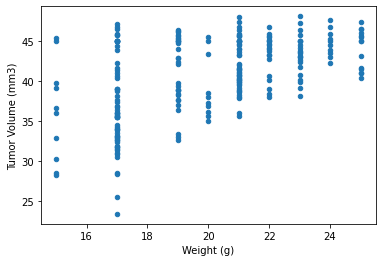

In [543]:
CapomulinDrug.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

In [290]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

CapomulinCorr = CapomulinDrug.corr()

In [291]:
CapomulinCorr

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.0000,0.5257
Weight (g),0.5257,1.0000


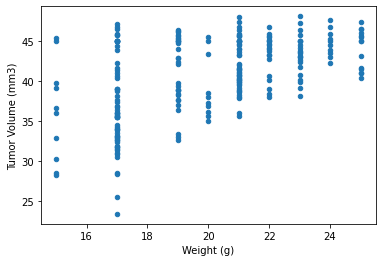

In [611]:
CapomulinDrug.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')


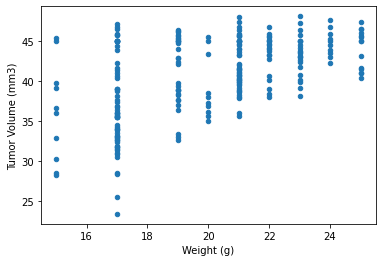

In [621]:
#linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

CapomulinDrug.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')


In [294]:
type(CapomulinDrug)


pandas.core.frame.DataFrame

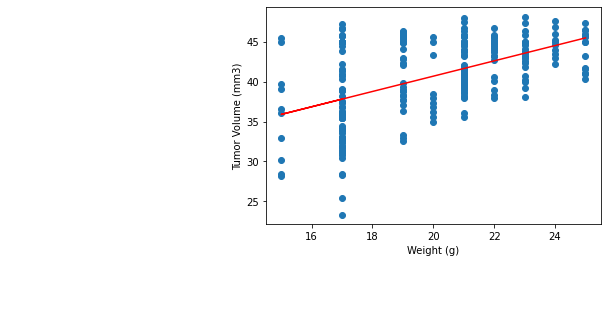

In [298]:
x_values = CapomulinDrug['Weight (g)']
y_values = CapomulinDrug['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lin_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,lin_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()